<a href="https://colab.research.google.com/github/thilanC/DataScience_assignment/blob/main/Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#import data set to workbook as df
df=pd.read_csv('/content/drive/MyDrive/Machine learning/DS_CaseStudy_Churn_Pred_Data.csv')

In [4]:
#check data frame data types
df.dtypes

delay                 float64
created_date            int64
pickup_date           float64
distance              float64
driver_rating         float64
fare                  float64
discount              float64
payment_method        float64
promocode              object
taximodelid             int64
travel_status           int64
trip_fare             float64
profile_created         int64
status_description     object
pre_booked              int64
passengerid             int64
tripid                  int64
dtype: object

In [5]:
#check df shape (number of raws and columns)
df.shape

(9004901, 17)

In [6]:
#Get sum of null values
df.isna().sum()

delay                 5077799
created_date                0
pickup_date           5077799
distance              5081668
driver_rating         9004901
fare                  5081668
discount              5081668
payment_method              7
promocode             7063769
taximodelid                 0
travel_status               0
trip_fare             5081668
profile_created             0
status_description          0
pre_booked                  0
passengerid                 0
tripid                      0
dtype: int64

In [7]:
#Dataframe 1st 5 raws
df.head()

,delay,created_date,pickup_date,distance,driver_rating,fare,discount,payment_method,promocode,taximodelid,travel_status,trip_fare,profile_created,status_description,pre_booked,passengerid,tripid
0,NaN,20190809,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,12,NaN,20170223,Unavailable,0,107206,7542464
1,8.38,20190701,20190701.0,16.49,NaN,676.13,0.0,1.0,NaN,1,1,676.13,20180201,Completed,0,123034,6044316
2,16.45,20190830,20190830.0,14.39,NaN,836.63,0.0,1.0,NaN,2,1,836.63,20180905,Completed,0,201136,1959290
3,NaN,20190709,NaN,NaN,NaN,NaN,NaN,1.0,lpp42,1,12,NaN,20180113,Unavailable,0,403293,1250879
4,NaN,20190718,NaN,NaN,NaN,NaN,NaN,1.0,abac,4,12,NaN,20190702,Unavailable,0,448530,884375


In [8]:
df['promocode'].value_counts()

LPP53                     41852
AVG58                     35312
DC26                      35306
7T7EVEN                   31519
6to6even                  28582
                          ...  
6t06PROMO Removed             1
LLP50 Removed                 1
lPP62                         1
768110909 Removed             1
mount mary inn Removed        1
Name: promocode, Length: 3584, dtype: int64

<Axes: xlabel='Status Description', ylabel='Count'>

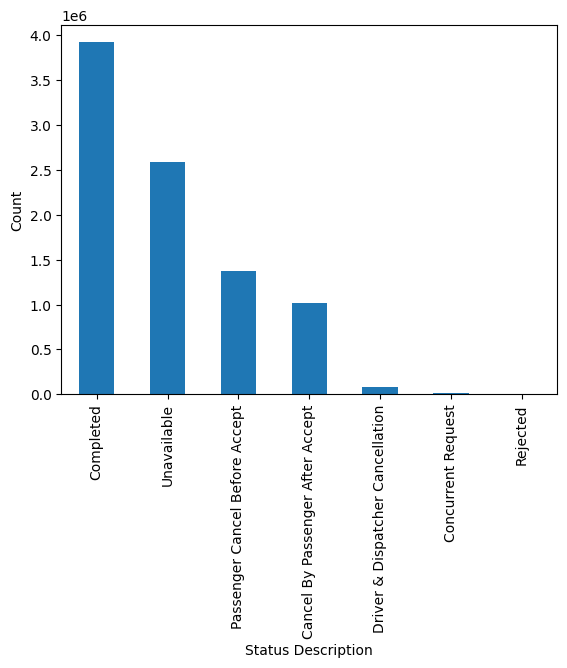

In [9]:
# Count the values in the 'status_description' column and create a bar plot
df.status_description.value_counts().plot(
    ylabel='Count',  # Set the label for the y-axis
    xlabel='Status Description',  # Set the label for the x-axis
    kind='bar'  # Create a bar plot
)


In [10]:
df['status_description'].value_counts()

Completed                           3923005
Unavailable                         2585817
Passenger Cancel Before Accept      1376812
Cancel By Passenger After Accept    1012955
Driver & Dispatcher Cancellation      85667
Concurrent Request                    20366
Rejected                                279
Name: status_description, dtype: int64

In [11]:
#drop unnecessary attributes
df.drop(['pickup_date','driver_rating','payment_method','promocode','trip_fare','status_description','pre_booked','tripid'],axis=1,inplace=True)

In [12]:
df.head()

,delay,created_date,distance,fare,discount,taximodelid,travel_status,profile_created,passengerid
0,NaN,20190809,NaN,NaN,NaN,1,12,20170223,107206
1,8.38,20190701,16.49,676.13,0.0,1,1,20180201,123034
2,16.45,20190830,14.39,836.63,0.0,2,1,20180905,201136
3,NaN,20190709,NaN,NaN,NaN,1,12,20180113,403293
4,NaN,20190718,NaN,NaN,NaN,4,12,20190702,448530


In [13]:
#check how many customer in here
len(df.passengerid.unique())

518744

In [14]:
# Function to convert the integer date format to "YYYY-MM-DD" string
def convert_date_format(date_int):
    date_str = str(date_int)
    original_date = datetime.strptime(date_str, '%Y%m%d')
    formatted_date_string = original_date.strftime('%Y-%m-%d')
    return formatted_date_string

In [15]:
# Apply the function to the date column
df['created_date'] = df['created_date'].apply(convert_date_format)
df['profile_created'] = df['profile_created'].apply(convert_date_format)

In [16]:
df.head()

,delay,created_date,distance,fare,discount,taximodelid,travel_status,profile_created,passengerid
0,NaN,2019-08-09,NaN,NaN,NaN,1,12,2017-02-23,107206
1,8.38,2019-07-01,16.49,676.13,0.0,1,1,2018-02-01,123034
2,16.45,2019-08-30,14.39,836.63,0.0,2,1,2018-09-05,201136
3,NaN,2019-07-09,NaN,NaN,NaN,1,12,2018-01-13,403293
4,NaN,2019-07-18,NaN,NaN,NaN,4,12,2019-07-02,448530


In [17]:
#drop null value contaning raws in distance column
df.dropna(subset=['distance'], inplace=True)

 Here distance culumn has huge null values. That null value means zero distance or else. I take only traveled customer details. So here I made an assumption consider only traveled customer details, customer will only churn or not if they travel.

In [18]:
df.shape

(3923233, 9)

In [19]:
#Get sum of null values
df.isna().sum()

delay              18
created_date        0
distance            0
fare                0
discount            0
taximodelid         0
travel_status       0
profile_created     0
passengerid         0
dtype: int64

In [20]:
#fill remain null values using zero
df = df.fillna(0)

In [21]:
# Count the number of trips for each 'passengerid' and create a num_trips
num_trips = df['passengerid'].value_counts().reset_index()

# Rename the columns to be more meaningfull
num_trips.columns = ['passengerid', 'Trip_count']

In [22]:
num_trips.shape

(463307, 2)

In [23]:
# Merge DataFrames num_trips and df on the 'passengerid' column
result = num_trips.merge(df[['passengerid', 'profile_created']], on='passengerid', how='left')
#drop duplicate values
result=result.drop_duplicates()

In [24]:
result

,passengerid,Trip_count,profile_created
0,140928,1000,2016-08-26
1000,111844,803,2017-11-16
1803,516864,598,2019-03-12
2401,65258,501,2018-05-10
2902,20860,499,2019-03-18
...,...,...,...
3923228,50392,1,2019-01-15
3923229,134779,1,2019-07-13
3923230,183035,1,2019-06-04
3923231,181107,1,2018-11-20


Create new dataframe using **df** columns, it has trips and trip details of customers. so here I create new dataframe using given details.

In [25]:
# Group by 'passengerid' and calculate the mean of the 'delay' column for each group
delays = df.groupby('passengerid')['delay'].agg('mean').reset_index()

# Rename the columns in the result DataFrame to be more meaningful
delays.columns = ['passengerid', 'delay']

# Merge DataFrames 'result' and 'delays' on the 'passengerid' column
result = result.merge(delays[['passengerid', 'delay']], on='passengerid', how='left')
# Remove any duplicate rows in the 'result' DataFrame
result=result.drop_duplicates()

In [26]:
# Group by 'passengerid' and calculate the mean of the 'distance' column for each group
distance = df.groupby('passengerid')['distance'].agg('mean').reset_index()

# Rename the columns in the result DataFrame to be more meaningful
distance.columns = ['passengerid', 'distance']

# Merge DataFrames 'result' and 'distance' on the 'passengerid' column
result = result.merge(distance[['passengerid', 'distance']], on='passengerid', how='left')
result=result.drop_duplicates()

In [27]:
# Group by 'passengerid' and calculate the mean of the 'fare' column for each group
fare = df.groupby('passengerid')['fare'].agg('mean').reset_index()

# Rename the columns in the result DataFrame to be more meaningful
fare.columns = ['passengerid', 'fare']

# Merge DataFrames 'result' and 'fare' on the 'passengerid' column
result = result.merge(fare[['passengerid', 'fare']], on='passengerid', how='left')
result=result.drop_duplicates()

In [28]:
# Group by 'passengerid' and calculate the mean of the 'taximodelid' column for each group
taximodelid = df.groupby('passengerid')['taximodelid'].agg('mean').reset_index()

# Rename the columns in the result DataFrame to be more meaningful
taximodelid.columns = ['passengerid', 'taximodelid']

# Merge DataFrames 'result' and 'taximodelid' on the 'passengerid' column
result = result.merge(taximodelid[['passengerid', 'taximodelid']], on='passengerid', how='left')
result=result.drop_duplicates()

In [29]:
# Group by 'passengerid' and calculate the mean of the 'travel_status' column for each group
travel_status = df.groupby('passengerid')['travel_status'].agg('mean').reset_index()

# Rename the columns in the result DataFrame to be more meaningful
travel_status.columns = ['passengerid', 'travel_status']

# Merge DataFrames 'result' and 'travel_status' on the 'passengerid' column
result = result.merge(travel_status[['passengerid', 'travel_status']], on='passengerid', how='left')
result=result.drop_duplicates()

In [30]:
# Convert the 'profile_created' column to datetime
result['profile_created'] = pd.to_datetime(result['profile_created'])

# Group by 'passengerid' and find the latest 'created_date' for each group
latest_dates = df.groupby('passengerid')['created_date'].agg('max').reset_index()

# Rename the columns in the 'latest_dates' DataFrame
latest_dates.columns = ['passengerid', 'Latest_Date']

# Merge the 'result' DataFrame with the 'latest_dates' DataFrame on the 'passengerid' column
result = result.merge(latest_dates[['passengerid', 'Latest_Date']], on='passengerid', how='left')
result=result.drop_duplicates()

In [31]:
result

,passengerid,Trip_count,profile_created,delay,distance,fare,taximodelid,travel_status,Latest_Date
0,140928,1000,2016-08-26,15.399300,25.861310,1355.744040,4.203000,1.007000,2019-08-31
1,111844,803,2017-11-16,18.126924,31.909838,1831.212042,3.843088,1.008717,2019-08-31
2,516864,598,2019-03-12,5.585803,11.607709,531.972642,1.073579,1.011706,2019-08-31
3,65258,501,2018-05-10,11.123134,13.657385,771.894371,2.453094,1.000000,2019-08-31
4,20860,499,2019-03-18,-75.916453,18.631363,1019.229940,2.022044,1.000000,2019-08-30
...,...,...,...,...,...,...,...,...,...
463302,50392,1,2019-01-15,3.120000,2.150000,104.650000,1.000000,1.000000,2019-08-27
463303,134779,1,2019-07-13,0.130000,3.470000,149.440000,1.000000,1.000000,2019-07-13
463304,183035,1,2019-06-04,15.720000,0.420000,61.070000,1.000000,1.000000,2019-06-04
463305,181107,1,2018-11-20,1.750000,6.680000,266.010000,1.000000,1.000000,2019-07-26


In [32]:
result['Latest_Date'] = pd.to_datetime(result['Latest_Date'])

# Define a function to calculate the average value
def calculate_average(row):
    return (row['Latest_Date'] - row['profile_created']).days / row['Trip_count']

# Apply the function to each row and create a new 'average' column
result['average_days'] = result.apply(calculate_average, axis=1)

In [33]:
result

,passengerid,Trip_count,profile_created,delay,distance,fare,taximodelid,travel_status,Latest_Date,average_days
0,140928,1000,2016-08-26,15.399300,25.861310,1355.744040,4.203000,1.007000,2019-08-31,1.100000
1,111844,803,2017-11-16,18.126924,31.909838,1831.212042,3.843088,1.008717,2019-08-31,0.813200
2,516864,598,2019-03-12,5.585803,11.607709,531.972642,1.073579,1.011706,2019-08-31,0.287625
3,65258,501,2018-05-10,11.123134,13.657385,771.894371,2.453094,1.000000,2019-08-31,0.954092
4,20860,499,2019-03-18,-75.916453,18.631363,1019.229940,2.022044,1.000000,2019-08-30,0.330661
...,...,...,...,...,...,...,...,...,...,...
463302,50392,1,2019-01-15,3.120000,2.150000,104.650000,1.000000,1.000000,2019-08-27,224.000000
463303,134779,1,2019-07-13,0.130000,3.470000,149.440000,1.000000,1.000000,2019-07-13,0.000000
463304,183035,1,2019-06-04,15.720000,0.420000,61.070000,1.000000,1.000000,2019-06-04,0.000000
463305,181107,1,2018-11-20,1.750000,6.680000,266.010000,1.000000,1.000000,2019-07-26,248.000000


In [34]:
#here is the latest date of data set
result.Latest_Date.max()

Timestamp('2019-08-31 00:00:00')

In [35]:
# Convert the 'date_column' to datetime
df['created_date'] = pd.to_datetime(df['created_date'])

In [36]:
# Define the date range
start_date = pd.to_datetime('2019-08-17')
end_date = pd.to_datetime('2019-08-31')

# Filter the DataFrame 'df' to include only dates within the specified date range
# Group the filtered data by 'passengerid' and count the dates in the specified date range for each group
date_counts1 = df[(df['created_date'] >= start_date) & (df['created_date'] <= end_date)].groupby('passengerid')['created_date'].count().reset_index()

# Rename the columns in the result DataFrame to make them more meaningful
date_counts1.columns = ['passengerid', 'Within_14days_trips']

# The 'date_counts' DataFrame now contains the count of trips within the specified 14-day date range for each unique passenger ID
print(date_counts1)

        passengerid  Within_14days_trips
0                 2                    2
1                 6                    1
2                 7                   26
3                11                    3
4                12                    3
...             ...                  ...
205894       528727                    5
205895       528730                    1
205896       528731                    2
205897       528740                    2
205898       528742                    1

[205899 rows x 2 columns]


In [37]:
# Merge the 'result' DataFrame with the 'date_counts' DataFrame based on the 'passengerid' column
result = result.merge(date_counts1[['passengerid', 'Within_14days_trips']], on='passengerid', how='left')
result=result.drop_duplicates()

In [38]:
# Define the date range
start_date = pd.to_datetime('2019-07-31')
end_date = pd.to_datetime('2019-08-31')

# Filter the DataFrame 'df' to include only dates within the specified date range
# Group the filtered data by 'passengerid' and count the dates in the specified date range for each group
date_counts2 = df[(df['created_date'] >= start_date) & (df['created_date'] <= end_date)].groupby('passengerid')['created_date'].count().reset_index()

# Rename the columns in the result DataFrame to make them more meaningful
date_counts2.columns = ['passengerid', 'Within_month_trips']

In [39]:
# Merge the 'result' DataFrame with the 'date_counts' DataFrame based on the 'passengerid' column
result = result.merge(date_counts2[['passengerid', 'Within_month_trips']], on='passengerid', how='left')
result=result.drop_duplicates()

In [40]:
# Define the date range
start_date = pd.to_datetime('2019-06-30')
end_date = pd.to_datetime('2019-08-31')

# Filter the DataFrame 'df' to include only dates within the specified date range
# Group the filtered data by 'passengerid' and count the dates in the specified date range for each group
date_counts3 = df[(df['created_date'] >= start_date) & (df['created_date'] <= end_date)].groupby('passengerid')['created_date'].count().reset_index()

# Rename the columns in the result DataFrame
date_counts3.columns = ['passengerid', 'Within_2month_trips']

In [41]:
result = result.merge(date_counts3[['passengerid', 'Within_2month_trips']], on='passengerid', how='left')
result=result.drop_duplicates()

In [42]:
result

,passengerid,Trip_count,profile_created,delay,distance,fare,taximodelid,travel_status,Latest_Date,average_days,Within_14days_trips,Within_month_trips,Within_2month_trips
0,140928,1000,2016-08-26,15.399300,25.861310,1355.744040,4.203000,1.007000,2019-08-31,1.100000,187.0,376.0,611.0
1,111844,803,2017-11-16,18.126924,31.909838,1831.212042,3.843088,1.008717,2019-08-31,0.813200,134.0,289.0,560.0
2,516864,598,2019-03-12,5.585803,11.607709,531.972642,1.073579,1.011706,2019-08-31,0.287625,130.0,244.0,438.0
3,65258,501,2018-05-10,11.123134,13.657385,771.894371,2.453094,1.000000,2019-08-31,0.954092,85.0,188.0,373.0
4,20860,499,2019-03-18,-75.916453,18.631363,1019.229940,2.022044,1.000000,2019-08-30,0.330661,70.0,150.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463302,50392,1,2019-01-15,3.120000,2.150000,104.650000,1.000000,1.000000,2019-08-27,224.000000,1.0,1.0,1.0
463303,134779,1,2019-07-13,0.130000,3.470000,149.440000,1.000000,1.000000,2019-07-13,0.000000,NaN,NaN,1.0
463304,183035,1,2019-06-04,15.720000,0.420000,61.070000,1.000000,1.000000,2019-06-04,0.000000,NaN,NaN,NaN
463305,181107,1,2018-11-20,1.750000,6.680000,266.010000,1.000000,1.000000,2019-07-26,248.000000,NaN,NaN,1.0


In [43]:
#check sum of null values contain in each column
result.isna().sum()

passengerid                 0
Trip_count                  0
profile_created             0
delay                       0
distance                    0
fare                        0
taximodelid                 0
travel_status               0
Latest_Date                 0
average_days                0
Within_14days_trips    257408
Within_month_trips     167772
Within_2month_trips     69040
dtype: int64

In [44]:
#Here we can fill null values using 0, here null values means that custormer did not travel withing that time period.

# Fill null values in the 'result' DataFrame with 0
result = result.fillna(0)

In [45]:
result.isna().sum()

passengerid            0
Trip_count             0
profile_created        0
delay                  0
distance               0
fare                   0
taximodelid            0
travel_status          0
Latest_Date            0
average_days           0
Within_14days_trips    0
Within_month_trips     0
Within_2month_trips    0
dtype: int64

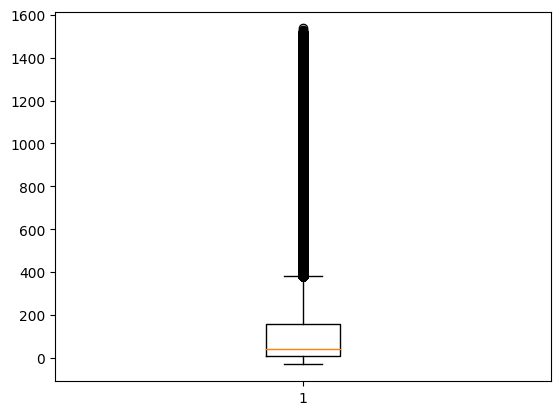

In [46]:
# Creating boxplot
plt.boxplot(result['average_days'])
plt.show()

#here I can get a idea outliers in average_days column and set cutoff limit

In [47]:
#get maximum average_days column value
result.average_days.max()

1536.0

Here I define my custormer churn criteria,  

*   average_days - The average number of days customers take to travel
*   Within_month_trips - Customer's last month's travel frequency
* Within_2month_trips - Customer's last 2 month's travel frequency


***If the 'average_days' is less than 30 and there are no trips within the last month (Within_month_trips is 0) or if the 'average_days' is less than 60 and there are no trips within the last 2 months (Within_2month_trips is 0), the 'Churn' value is set to 'yes'; otherwise, it's set to 'no'.***

***if the 'average_days' is greater than 3 months and sets 'Churn' to 'yes' for customers with such long 'average_days'.***

In [48]:
# Calculate the 'Churn' column based on specified conditions
result['Churn'] = np.where(
    ((result['average_days'] < 30) & (result['Within_month_trips'] == 0)) |
    ((result['average_days'] < 60) & (result['Within_2month_trips'] == 0)),
    'Yes',
    'No'
)

# Set 'Churn' to 'yes' for customers with 'average_days' greater than 270
result.loc[result['average_days'] > 270, 'Churn'] = 'Yes'


In [49]:
result

,passengerid,Trip_count,profile_created,delay,distance,fare,taximodelid,travel_status,Latest_Date,average_days,Within_14days_trips,Within_month_trips,Within_2month_trips,Churn
0,140928,1000,2016-08-26,15.399300,25.861310,1355.744040,4.203000,1.007000,2019-08-31,1.100000,187.0,376.0,611.0,No
1,111844,803,2017-11-16,18.126924,31.909838,1831.212042,3.843088,1.008717,2019-08-31,0.813200,134.0,289.0,560.0,No
2,516864,598,2019-03-12,5.585803,11.607709,531.972642,1.073579,1.011706,2019-08-31,0.287625,130.0,244.0,438.0,No
3,65258,501,2018-05-10,11.123134,13.657385,771.894371,2.453094,1.000000,2019-08-31,0.954092,85.0,188.0,373.0,No
4,20860,499,2019-03-18,-75.916453,18.631363,1019.229940,2.022044,1.000000,2019-08-30,0.330661,70.0,150.0,309.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463302,50392,1,2019-01-15,3.120000,2.150000,104.650000,1.000000,1.000000,2019-08-27,224.000000,1.0,1.0,1.0,No
463303,134779,1,2019-07-13,0.130000,3.470000,149.440000,1.000000,1.000000,2019-07-13,0.000000,0.0,0.0,1.0,Yes
463304,183035,1,2019-06-04,15.720000,0.420000,61.070000,1.000000,1.000000,2019-06-04,0.000000,0.0,0.0,0.0,Yes
463305,181107,1,2018-11-20,1.750000,6.680000,266.010000,1.000000,1.000000,2019-07-26,248.000000,0.0,0.0,1.0,No


In [50]:
#calculate churn column values
result["Churn"].value_counts()

No     322952
Yes    140355
Name: Churn, dtype: int64

In [51]:
result.head()

,passengerid,Trip_count,profile_created,delay,distance,fare,taximodelid,travel_status,Latest_Date,average_days,Within_14days_trips,Within_month_trips,Within_2month_trips,Churn
0,140928,1000,2016-08-26,15.399300,25.861310,1355.744040,4.203000,1.007000,2019-08-31,1.100000,187.0,376.0,611.0,No
1,111844,803,2017-11-16,18.126924,31.909838,1831.212042,3.843088,1.008717,2019-08-31,0.813200,134.0,289.0,560.0,No
2,516864,598,2019-03-12,5.585803,11.607709,531.972642,1.073579,1.011706,2019-08-31,0.287625,130.0,244.0,438.0,No
3,65258,501,2018-05-10,11.123134,13.657385,771.894371,2.453094,1.000000,2019-08-31,0.954092,85.0,188.0,373.0,No
4,20860,499,2019-03-18,-75.916453,18.631363,1019.229940,2.022044,1.000000,2019-08-30,0.330661,70.0,150.0,309.0,No


In [52]:
# Create a new DataFrame 'df2' by dropping selected columns from the 'result' DataFrame
df2=result.drop(['profile_created','Latest_Date','Within_14days_trips','Within_month_trips','Within_2month_trips','passengerid'],axis=1)

In [53]:
df2.head()

,Trip_count,delay,distance,fare,taximodelid,travel_status,average_days,Churn
0,1000,15.399300,25.861310,1355.744040,4.203000,1.007000,1.100000,No
1,803,18.126924,31.909838,1831.212042,3.843088,1.008717,0.813200,No
2,598,5.585803,11.607709,531.972642,1.073579,1.011706,0.287625,No
3,501,11.123134,13.657385,771.894371,2.453094,1.000000,0.954092,No
4,499,-75.916453,18.631363,1019.229940,2.022044,1.000000,0.330661,No


In [54]:
df2_numeric = df2.drop(['Churn'],axis=1)

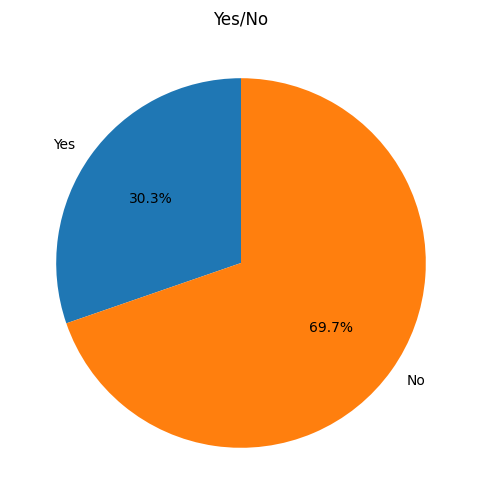

In [55]:
# Count the 'Yes' and 'No' values
yes_count = df2['Churn'].value_counts()['Yes']
no_count = df2['Churn'].value_counts()['No']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([yes_count, no_count], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90)
plt.title('Yes/No')

# Show the pie chart
plt.show()

In [56]:
# Customers leaving the company
churn = df2.loc[df2["Churn"]=="Yes"]
churn_not = df2.loc[df2["Churn"]=="No"]

In [57]:
churn

,Trip_count,delay,distance,fare,taximodelid,travel_status,average_days,Churn
81,212,7.165000,13.136745,557.226038,1.735849,1.0,0.259434,Yes
117,196,0.596837,2.558980,119.142653,1.000000,1.0,1.683673,Yes
669,131,8.295573,10.678168,463.287863,1.061069,1.0,5.534351,Yes
946,120,0.125750,3.336917,151.178083,1.000000,1.0,6.158333,Yes
1128,115,6.441652,6.025826,274.489130,1.000000,1.0,10.382609,Yes
...,...,...,...,...,...,...,...,...
463299,1,3.750000,0.080000,140.560000,2.000000,1.0,0.000000,Yes
463301,1,7.180000,8.070000,330.000000,1.000000,1.0,620.000000,Yes
463303,1,0.130000,3.470000,149.440000,1.000000,1.0,0.000000,Yes
463304,1,15.720000,0.420000,61.070000,1.000000,1.0,0.000000,Yes


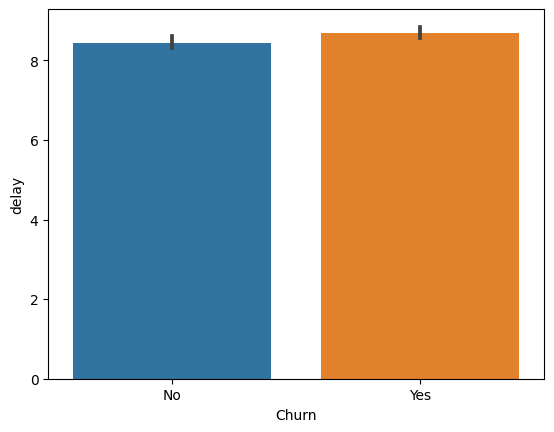

In [58]:
# Create a box plot using seaborn
sns.barplot(x='Churn', y='delay', data=df2)

# Set plot labels
plt.xlabel('Churn')
plt.ylabel('delay')

# Show the plot
plt.show()

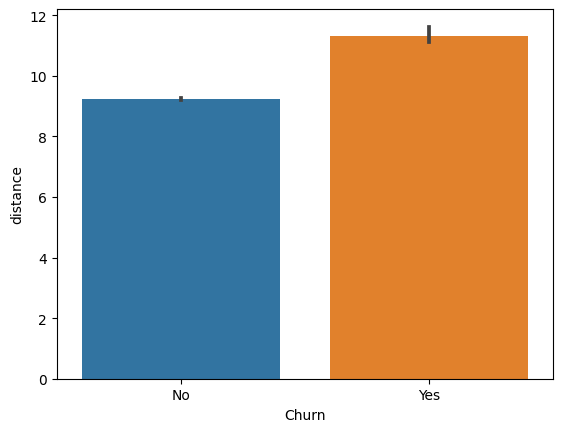

In [59]:
# Create a box plot using seaborn
sns.barplot(x='Churn', y='distance', data=df2)

# Set plot labels
plt.xlabel('Churn')
plt.ylabel('distance')

# Show the plot
plt.show()

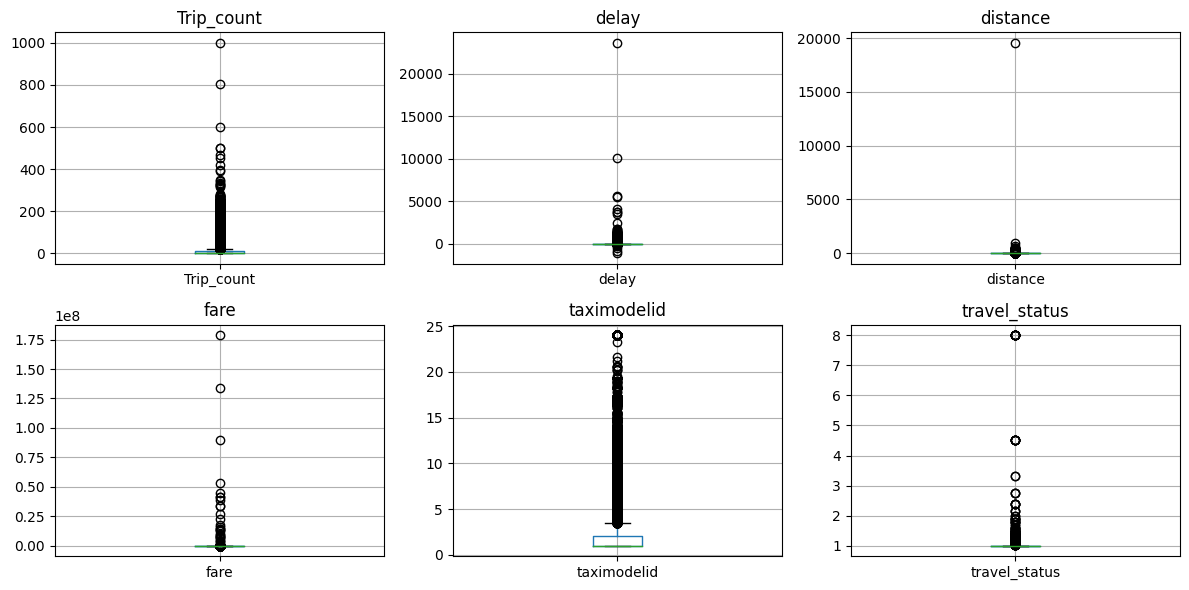

In [74]:
# Create a 2x3 grid of subplots for boxplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Specify the columns for each subplot
columns_to_plot = df2.columns

# Create individual boxplots for each subplot
df2.boxplot(column=columns_to_plot[0], ax=axes[0, 0])
axes[0, 0].set_title(columns_to_plot[0])

df2.boxplot(column=columns_to_plot[1], ax=axes[0, 1])
axes[0, 1].set_title(columns_to_plot[1])

df2.boxplot(column=columns_to_plot[2], ax=axes[0, 2])
axes[0, 2].set_title(columns_to_plot[2])

df2.boxplot(column=columns_to_plot[3], ax=axes[1, 0])
axes[1, 0].set_title(columns_to_plot[3])

df2.boxplot(column=columns_to_plot[4], ax=axes[1, 1])
axes[1, 1].set_title(columns_to_plot[4])

df2.boxplot(column=columns_to_plot[5], ax=axes[1, 2])
axes[1, 2].set_title(columns_to_plot[5])

# Adjust layout and spacing
plt.tight_layout()

# Show the subplots
plt.show()

<Axes: >

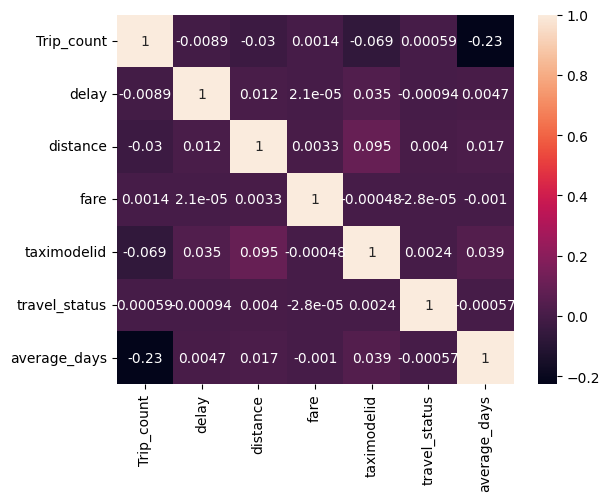

In [61]:
sns.heatmap(df2_numeric.corr(), annot=True)

In [62]:
# Separate features and target variable
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [63]:
# Normalize numerical variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
y.replace('Yes',1,inplace=True)
y.replace('No',0,inplace=True)

In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [67]:
y_train.value_counts()

0    258318
1    258318
Name: Churn, dtype: int64

In [68]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     64634
           1       0.49      0.53      0.51     28028

    accuracy                           0.69     92662
   macro avg       0.64      0.65      0.64     92662
weighted avg       0.70      0.69      0.70     92662

[[49344 15290]
 [13092 14936]]


In [69]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     64634
           1       0.73      0.86      0.79     28028

    accuracy                           0.86     92662
   macro avg       0.83      0.86      0.84     92662
weighted avg       0.87      0.86      0.87     92662

[[55691  8943]
 [ 3789 24239]]


In [70]:
model = XGBClassifier()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))
print(confusion_matrix(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     64634
           1       0.72      0.90      0.80     28028

    accuracy                           0.86     92662
   macro avg       0.84      0.88      0.85     92662
weighted avg       0.88      0.86      0.87     92662

[[54692  9942]
 [ 2680 25348]]


In [71]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))
print(confusion_matrix(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     64634
           1       0.71      0.90      0.80     28028

    accuracy                           0.86     92662
   macro avg       0.83      0.87      0.84     92662
weighted avg       0.88      0.86      0.86     92662

[[54451 10183]
 [ 2799 25229]]


We can go with **RandomForestClassifier()** model. it gives high accuracy and is very good with other metrics.
